# **Penambangan Data**

## Dissimilarity (Tugas 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)

In [ ]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
# Show dataset shape
number_of_columns = data.shape[1]

In [ ]:
# Show all columns for dataset
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [ ]:
# Show all columns from dataframe
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Categorical/ Nominal


*   gender
*   heart_disease



In [ ]:
data[["id","gender", "heart_disease"]].head(5)

,id,gender,heart_disease
0,9046,Male,1
1,51676,Female,0
2,31112,Male,1
3,60182,Female,0
4,1665,Female,0


###Change Value 0/1
Value of gender

*   Female = 1
*   Male = 0



In [ ]:
# gender code
code_f = "Female"
code_m = "Male"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_gender_to_biner(gender):
    return value_of_one if gender == code_m else value_of_zero

In [ ]:
# Update all values of 'gender' series
data["gender"] = data["gender"].apply(change_code_gender_to_biner)

In [ ]:
data[["id","gender", "heart_disease"]].head(5)

,id,gender,heart_disease
0,9046,1,1
1,51676,0,0
2,31112,1,1
3,60182,0,0
4,1665,0,0


In [ ]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(data, idx, series):
    return data.loc[(idx), series]

In [ ]:
def get_dissimilarity_dataset(data, series_index = [], series = []):
    first_series = get_series(data, series_index[0], series)
    second_series = get_series(data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
get_dissimilarity_dataset(data, [1,2], ["gender", "heart_disease"]).T

,1,2
gender,0,1
heart_disease,0,1


In [ ]:
data.loc[0:4, ["gender", "heart_disease"]]

,gender,heart_disease
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


In [ ]:
def count_contingency_value(data, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = data.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(data.loc[(start_index):(last_index), data.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
# d(1,2)
data_1_2 = get_dissimilarity_dataset(data, [1,2], ["gender", "heart_disease"])

In [ ]:
c_d_1_2 = count_contingency_value(data_1_2, 1, 2)

In [ ]:
# d(1,3)
data_1_3 = get_dissimilarity_dataset(data, [1,3], ["gender", "heart_disease"])

In [ ]:
c_d_1_3 = count_contingency_value(data_1_3, 1, 3)

In [ ]:
# d(1,4)
data_1_4 = get_dissimilarity_dataset(data, [1,4], ["gender", "heart_disease"])

In [ ]:
c_data_1_4 = count_contingency_value(data_1_4, 1, 4)

In [ ]:
# d(1,5)
data_1_5 = get_dissimilarity_dataset(data, [1,5], ["gender", "heart_disease"])

In [ ]:
c_data_1_5 = count_contingency_value(data_1_5, 1, 5)

### Dissimilarity Binary Assymetric Value Formula
$$\frac {p + r } {q + r + s}$$

In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)

In [ ]:
d_1_2

1.0

In [ ]:
d_1_3

1.0

In [ ]:
d_1_4

1.0

## Diskritisasi (Tugas 2)

### Pengertian Diskritisasi
Diskritisasi adalah mengurangi jumlah nilai-nilai dari atribut kontinu yang diberikan dengan membagi range atribut kedalam interval-interval. Label interval tersebut dapat mengganti nilai data sesungguhnya.
Diskritisasi adalah proses mengubah data bertipe data numeric menjadi data bertipe categorical.

Diskritisasi memiliki 2 pendekatan yaitu equal-width intervals dan equal-frequency intervals


*   equal-width intervals adalah diskritisasi dengan lebar data yang sama.
*  equal-frequency intervals adalah diskritisasi dengan jumlah data yang sama

### Cut
Cut adalah sebuah method pada library pandas untuk melakukan perhitungan equal width frequency intervals

**Soal**
1. Carilah data yang bertipe numerik ( data klassifikasi)

2. Lakukan proses diskritisasi dengan equal width dan equal frequency

3. Lakukan proses diskritisasi  dengan basis entropy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Diskritisasi dengan equal width
rumus $$ w= \frac {x_{min}-x_{max}} {k}$$

$$ v_i= x_{min} + i * w$$

dimana i = 1,2,3,..k

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

In [ ]:
data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
def equalwidth1(data):
  Xmax=max(data["sepal.length"])
  Xmin=min(data["sepal.length"])

  w=(Xmax-Xmin)/5

  v1=Xmin+(1*w)
  v2=Xmin+(2*w)
  v3=Xmin+(3*w)
  v4=Xmin+(4*w)
  v5=Xmin+(5*w)


  for i in range(len(data["sepal.length"])):
    if data["sepal.length"][i]<=v1:
      data["sepal.length"][i]="A"
    elif data["sepal.length"][i]>v1 and data["sepal.length"][i]<=v2:
      data["sepal.length"][i]="B"
    elif data["sepal.length"][i]>v2 and data["sepal.length"][i]<=v3:
      data["sepal.length"][i]="C"
    elif data["sepal.length"][i]>v3 and data["sepal.length"][i]<=v4:
      data["sepal.length"][i]="D"
    else:
      data["sepal.length"][i]="E"

def equalwidth2(data):
  Xmax=max(data["sepal.width"])
  Xmin=min(data["sepal.width"])

  w=(Xmax-Xmin)/5

  v1=Xmin+(1*w)
  v2=Xmin+(2*w)
  v3=Xmin+(3*w)
  v4=Xmin+(4*w)
  v5=Xmin+(5*w)


  for i in range(len(data["sepal.width"])):
    if data["sepal.width"][i]<=v1:
      data["sepal.width"][i]="A"
    elif data["sepal.width"][i]>v1 and data["sepal.width"][i]<=v2:
      data["sepal.width"][i]="B"
    elif data["sepal.width"][i]>v2 and data["sepal.width"][i]<=v3:
      data["sepal.width"][i]="C"
    elif data["sepal.width"][i]>v3 and data["sepal.width"][i]<=v4:
      data["sepal.width"][i]="D"
    else:
      data["sepal.width"][i]="E"

def equalwidth3(data):
  Xmax=max(data["petal.length"])
  Xmin=min(data["petal.length"])

  w=(Xmax-Xmin)/5

  v1=Xmin+(1*w)
  v2=Xmin+(2*w)
  v3=Xmin+(3*w)
  v4=Xmin+(4*w)
  v5=Xmin+(5*w)


  for i in range(len(data["petal.length"])):
    if data["petal.length"][i]<=v1:
      data["petal.length"][i]="A"
    elif data["petal.length"][i]>v1 and data["petal.length"][i]<=v2:
      data["petal.length"][i]="B"
    elif data["petal.length"][i]>v2 and data["petal.length"][i]<=v3:
      data["petal.length"][i]="C"
    elif data["petal.length"][i]>v3 and data["petal.length"][i]<=v4:
      data["petal.length"][i]="D"
    else:
      data["petal.length"][i]="E"

def equalwidth4(data):
  Xmax=max(data["petal.width"])
  Xmin=min(data["petal.width"])

  w=(Xmax-Xmin)/5

  v1=Xmin+(1*w)
  v2=Xmin+(2*w)
  v3=Xmin+(3*w)
  v4=Xmin+(4*w)
  v5=Xmin+(5*w)


  for i in range(len(data["petal.width"])):
    if data["petal.width"][i]<=v1:
      data["petal.width"][i]="A"
    elif data["petal.width"][i]>v1 and data["petal.width"][i]<=v2:
      data["petal.width"][i]="B"
    elif data["petal.width"][i]>v2 and data["petal.width"][i]<=v3:
      data["petal.width"][i]="C"
    elif data["petal.width"][i]>v3 and data["petal.width"][i]<=v4:
      data["petal.width"][i]="D"
    else:
      data["petal.width"][i]="E"

In [ ]:
def equalwidth(data):
  equalwidth1(data)
  equalwidth2(data)
  equalwidth3(data)
  equalwidth4(data)

In [ ]:
equalwidth(data)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

,sepal.length,sepal.width,petal.length,petal.width,variety
0,B,D,A,A,Setosa
1,A,C,A,A,Setosa
2,A,C,A,A,Setosa
3,A,C,A,A,Setosa
4,A,D,A,A,Setosa
...,...,...,...,...,...
145,D,C,D,E,Virginica
146,C,B,D,D,Virginica
147,D,C,D,D,Virginica
148,C,C,D,E,Virginica


####Diskritisasi dengan equal frequency

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

In [ ]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
data_sepal_length = data[["sepal.length"]]
data_sepal_width = data[["sepal.width"]]
data_petal_length = data[["petal.length"]]
data_petal_width = data[["petal.width"]]

In [ ]:
def qcut(col, k):
    intervals = pd.qcut(data[col], k).value_counts().index.to_list()
    return [[interval.left, interval.right] for interval in intervals]

In [ ]:
interval_sepal_length = qcut("sepal.length", 5)
interval_sepal_width = qcut("sepal.width", 5)
interval_petal_length = qcut("petal.length", 5)
interval_petal_width = qcut("petal.width", 5)

print("interval sepal.length :", interval_sepal_length)
print("interval sepal.width  :", interval_sepal_width)
print("interval petal.length :", interval_petal_length)
print("interval petal.width  :", interval_petal_width)

interval sepal.length : [[5.0, 5.6], [4.2989999999999995, 5.0], [5.6, 6.1], [6.52, 7.9], [6.1, 6.52]]
interval sepal.width  : [[2.7, 3.0], [1.999, 2.7], [3.1, 3.4], [3.4, 4.4], [3.0, 3.1]]
interval petal.length : [[0.999, 1.5], [4.64, 5.32], [5.32, 6.9], [3.9, 4.64], [1.5, 3.9]]
interval petal.width  : [[1.16, 1.5], [0.099, 0.2], [1.9, 2.5], [0.2, 1.16], [1.5, 1.9]]


In [ ]:
def equalfreq(list_interval, col):
    # mendapatkan panjang interval
    length = len(list_interval)

    # mengurutkan interval
    sort_interval = np.sort(list_interval, axis=0)
    # mendapatkan Category dari interval
    categories = np.array([chr(65+i) for i in range(length)])[:, None]
    # combine into interval data
    intervals = np.hstack((sort_interval, categories))

    newCol = []
    for i, row in data.iterrows():
        dat = row[col]
        for interval in intervals:
            if dat >= interval[0].astype(float) and dat <= interval[1].astype(float):
                newCol.append(interval[2])
                break

    return np.array(newCol, dtype=str)

In [ ]:
data["sepal.length"] = equalfreq(interval_sepal_length, "sepal.length")
data["sepal.width"] = equalfreq(interval_sepal_width, "sepal.width")
data["petal.length"] = equalfreq(interval_petal_length, "petal.length")
data["petal.width"] = equalfreq(interval_petal_width, "petal.width")

In [ ]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,B,E,A,A,Setosa
1,A,B,A,A,Setosa
2,A,D,A,A,Setosa
3,A,C,A,A,Setosa
4,A,E,A,A,Setosa
...,...,...,...,...,...
145,E,B,D,E,Virginica
146,D,A,D,D,Virginica
147,D,B,D,E,Virginica
148,D,D,E,E,Virginica


### Pengertian Entropy-based Binning
Metode berbasis Binning Entropy menggunakan pendekatan split. Entropi (atau konten informasi) dihitung berdasarkan label kelas. Secara intuitif,menemukan pemisahan terbaik sehingga bin semurni mungkin yang merupakan mayoritas nilai dalam bin sesuai dengan label kelas yang sama.

### Rumus Entropy 
 $$ Entropy = -Σ_i^n p_i log_2 p_i$$


In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
sample = data[["sepal.length"]]
sample.describe()

,sepal.length
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


membuat category random untuk semua data

In [ ]:
np.random.seed(0)
sample["category"] = np.where(np.random.choice(2, sample.shape[0]) < 1, "A", "B" )
sample
sample.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


150

Membut fungsi getOverollCategory digunakan untuk menghitung data keseluruhan yang nantinya digunakan untuk menghitung entropy

In [ ]:
def getOverollCategory(col):
    group = sample.loc[:, :].groupby("category").count()
    a = group.loc["A", col]
    b = group.loc["B", col]
    print(a,b, group)
    return (a, b, a+b)

###   Rumus Info Entropy split value
$$ Info_A(D) = \frac{|D_1|} {|D|} Entropy(D1) \frac{|D_2|} {|D|} + Entropy(D_2)$$

Fungsi splitter digunakan untuk membuat split antara value yang telah di tentukan lalu mengembalikan data yang telah di pisahkan

In [ ]:
def splitter(value:float, col:str)->tuple:
    # get data less and greater from value
    less = sample[sample[col] <= value]
    greater = sample[sample[col] > value]

    # calculate into category for each data
    less_group = less.loc[:, :].groupby("category").count()
    print(less_group)
    greater_group = greater.loc[:, :].groupby("category").count()

    # get value based on category
    less_category_A = less_group.loc["A", col]
    print(less_category_A)

    less_category_B = less_group.loc["B", col]
    greater_category_A = greater_group.loc["A", col]
    greater_category_B = greater_group.loc["B", col]

    return (
        [less_category_A, less_category_B, less_category_A + less_category_B],
        [greater_category_A, greater_category_B, greater_category_A + greater_category_B]
    )

Buat Fungsi entropy untuk mencari nilai entropy

In [ ]:
def entropy(d):
    r1 = (d[0] / d[2]) * np.log2(d[0] / d[2])
    r2 = (d[1] / d[2]) * np.log2(d[1] / d[2])
    return np.sum([r1, r2]) * -1

### Rumus gain
$$ Gain(E_{new}) = (E_{initial}) - (E_{new})$$

Membuat fungsi info dan gain

In [ ]:
def info(d):
    r1 = (d[0][2] / sample.shape[0]) * entropy(d[0])
    r2 = (d[1][2] / sample.shape[0]) * entropy(d[1])
    return r1 + r2

Fungsi gain untuk menghitung selsih antara entropy awal dengan yang baru

In [ ]:
def gain(Einitial, Enew):
    return Einitial - Enew

Membuat Dinitial

In [ ]:
D = getOverollCategory("sepal.length")
entropy_d = entropy(D)
print(D)
print(entropy_d)

68 82           sepal.length
category              
A                   68
B                   82
(68, 82, 150)
0.993707106604508


Melakukan beberapa tes split untuk mencri informasi yang terbaik

Split 1: 4.4

In [ ]:
split1 = splitter(4.4, "sepal.length")
info_split1 = info(split1)
gain(entropy_d, info_split1)

          sepal.length
category              
A                    1
B                    3
1


0.003488151753460178

In [ ]:
#split 2:5.5
split2 = splitter(5.5, "sepal.length")
info_split2 = info(split2)
gain(entropy_d, info_split2)

          sepal.length
category              
A                   22
B                   37
22


0.012302155146638905

In [ ]:
#split 3:7.0
split3 = splitter(7.0, "sepal.length")
info_split3 = info(split3)
gain(entropy_d, info_split3)

          sepal.length
category              
A                   62
B                   76
62


0.0005490214732508658

## K-Nearest Neighbors (KNN) (Tugas 3)

### Pengertian KNN
Algoritma K-Nearest Neighbors (KNN) adalah sebuah metode klasifikasi terhadap sekumpulan data berdasarkan pembelajaran data yang sudah terklasifikasikan sebelumya.

### Tahapan KNN
Tahapan dalam melakukan klasifikasi menggunakan algoritma KNN :

1.   Menentukan parameter k (jumlah tetangga paling dekat),
2.   Menghitung kuadrat jarak euclidean objek terhadap data training yang diberikan,
3. Mengurutkan hasil pada tahapan ke-2 secara ascending (berurutan dari nilai tinggi ke rendah),
4. Mengumpulkan kategori Y (klasifikasi nearest neighbors berdasarkan nilai k),
5. Dengan menggunakan kategori nearest neighbors yang paling mayoritas maka dapat dipredisikan kategori objek.

In [ ]:
import pandas as pd
#read in the data using pandas
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
#check data has been read in properly
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#check number of rows and columns in dataset
df.shape

(150, 5)

In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['variety'])
#check that the target variable has been removed
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#separate target values
y = df['variety'].values
#view target values
y[0:5]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array(['Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa'],
      dtype=object)

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
cv_scores mean:0.9666666666666668


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 6}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9800000000000001

Text(0, 0.5, 'Mean Error')

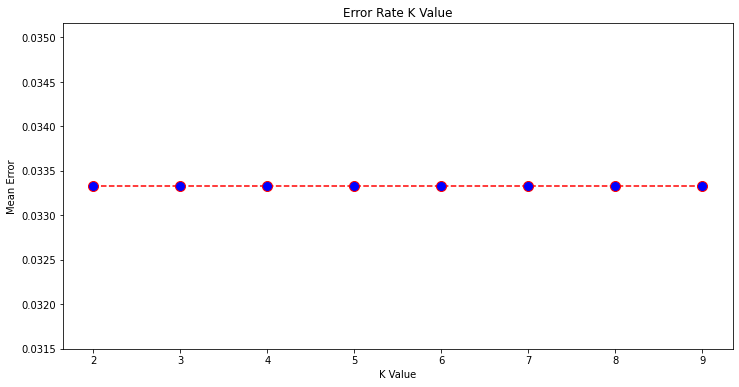

In [ ]:
# Calculating error for K values between 2 and 10
error = []
import matplotlib.pyplot as plt
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Naive Bayes Classifier(Tugas 4)

### Pengertian Naive Bayes Classifie
Pengklasifikasi Naive Bayes adalah model pembelajaran mesin probabilistik yang digunakan untuk tugas klasifikasi. Inti dari classifier didasarkan pada teorema Bayes.

### Rumus teorema bayes
$$ P(H|X) = \frac{P(X|H)P(H)} {P(X)}$$

Dimana :
*   **X** : Data kelas yang belum diketahui
*   **H** : Hipotesa dari X yang merupakan data kelas spesifik 
*   **P(H|X)** : Probabilitas hipotesa H berdasarkan kondisi X
*   **P(H)**   : Probabilitas hipotesa H
*   **P(X|H)** : Probabilitas X berdasarkan kondisi hipotesa H
*   **P(X)** : Probabilitas dari X







In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/Iris.csv'
data = pd.read_csv(url)

In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.drop(columns="Id",inplace=True)

In [ ]:
X=data.iloc[:,0:4].values
y=data.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
y_train.shape

(105,)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


## K-Means Clustering (Tugas 5)

### Pengertian K-Means
K-means merupakan salah satu algoritma yang bersifat unsupervised learning. K-Means memiliki fungsi untuk mengelompokkan data kedalam data cluster. Algoritma ini dapat menerima data tanpa ada label kategori. 

K-Means Clustering Algoritma juga merupakan metode non-hierarchy. Metode Clustering Algoritma adalah mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain. 

Cluster Sampling adalah teknik pengambilan sampel di mana unit-unit populasi dipilih secara acak dari kelompok yang sudah ada yang disebut ‘cluster, nah Clustering atau klasterisasi adalah salah satu masalah yang menggunakan teknik unsupervised learning.

### Karakteristik dari K-Means Cluster:

1. Cepat dalam proses clustering
2. Sensitif terhadap nilai centroid
3. Hasil dari Kmeans selalu berubah ubah(dikarenakan tidak unik)
4. Sulit meraih global optimum



### Kekurangan dari K-Means clustering

1. cluster model berbeda ditemukan
2. sulit untuk memilih jumlah cluster yang tepat
3. Overlapping
4. Kegagalan dalam konverge

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/Iris.csv'
columns = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url)

In [ ]:
data.drop(columns='Id',inplace=True)

In [ ]:
x = data.values[:, 0:4]

In [ ]:
y = data.values[:,4]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(y)

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dfkelas = pd.DataFrame(label, columns=['class'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)

In [ ]:
x_new

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [ ]:
from sklearn.cluster import KMeans
#number of cluster
kmeans = KMeans = KMeans(n_clusters=3)
#fitting the input data
kmeans= kmeans.fit(x_new)
#getting the clusters  labels
prediksi = kmeans.predict(x_new)
#centroids values
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 2.34645113,  0.27235455],
       [-2.64084076,  0.19051995],
       [ 0.66443351, -0.33029221]])

In [ ]:
x_new[:,1:12].shape

(150, 1)

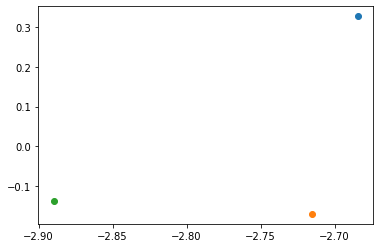

In [ ]:
from numpy import unique
from matplotlib import pyplot
from numpy import where 
yhat = unique(prediksi)
clusters = unique(yhat)
#create scatter plot for samples from each cluster
for cluster in clusters:
  #get row indexes for samples with this cluster
  row_ix = where (yhat == cluster)
  #create scatter of these samples
  pyplot.scatter(x_new[row_ix,0],x_new[row_ix,1])
#show the plot
pyplot.show()

In [ ]:
a=prediksi
mapping = {1:0, 0:1, 2:2}
a = [mapping[i] for i in a]

In [ ]:
prediksi = np.array(a)
prediksi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(label,prediksi)

0.09333333333333334

In [ ]:
type(x_new[row_ix, 0])

numpy.ndarray

In [ ]:
x_new[row_ix,0]

array([[-2.88981954]])

In [ ]:
x[row_ix,1]

array([[3.2]], dtype=object)

In [ ]:
yhat

array([0, 1, 2], dtype=int32)

## Decision tree (Tugas 6)

### Pengertian Decision Tree
Decision Tree (Pohon keputusan) adalah jenis pembelajaran mesin terawasi(supervise) yang digunakan untuk mengkategorikan atau membuat prediksi berdasarkan bagaimana serangkaian pertanyaan sebelumnya dijawab.
Supervise artinya model dilatih dan diuji pada sekumpulan data yang berisi kategorisasi yang diinginkan.

### Jenis Keputusan
Ada dua jenis utama pohon keputusan berdasarkan variabel sasaran, yaitu pohon keputusan variabel kategorikal dan pohon keputusan variabel kontinu.

1. Pohon keputusan variabel kategori
Sebuah pohon keputusan variabel kategoris termasuk variabel target kategoris dibagi ke dalam kategori. Misalnya, kategori bisa ya atau tidak. Kategori berarti bahwa setiap tahap proses pengambilan keputusan termasuk dalam salah satu kategori ini, dan tidak ada di antaranya.

2. Pohon keputusan variabel kontinu
Pohon keputusan variabel kontinu adalah pohon keputusan dengan variabel target kontinu. Misalnya, pendapatan individu yang pendapatannya tidak diketahui dapat diprediksi berdasarkan informasi yang tersedia seperti pekerjaan, usia, dan variabel kontinu lainnya.

### Rumus Gini Index
$$ Gini Index = 1-Σ_i^n (P_i)^2$$

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/Iris.csv'
data = pd.read_csv(url)

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
y = data["Species"]
X = data.drop(columns=["Species"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

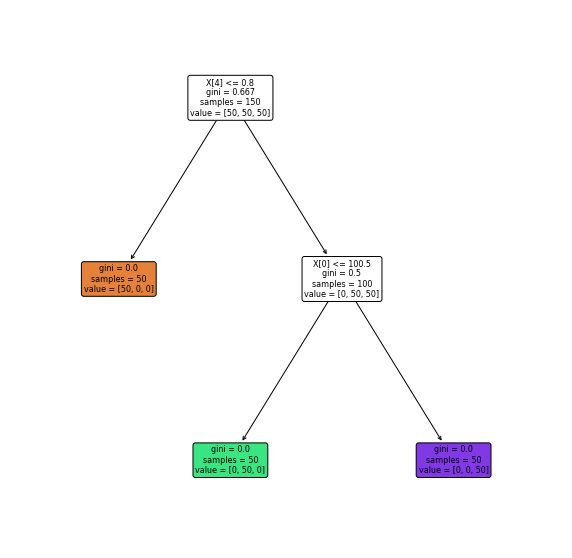

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()

## Implementasi Keputusan Bisnis (Tugas 7)
**Kasus Dengan Kredit Score**

### Studi Kasus Dengan Kredit Score

### Preprocessing data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/credit_score.csv")

df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [ ]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [ ]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
895,0,1
896,0,1
897,1,0
898,1,0


In [ ]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,4,0,1,0,0,0,1,0
1,AGR-000011,271,36,5,4,0,1,0,0,0,1,0
2,AGR-000030,159,12,0,1,1,0,1,0,0,0,0
3,AGR-000043,210,12,3,3,0,1,0,0,1,0,0
4,AGR-000049,165,36,0,2,1,0,0,1,0,0,0


In [ ]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [ ]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [ ]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,0,1,0,0,0,1,0,4
1,AGR-000011,271,36,5,0,1,0,0,0,1,0,4
2,AGR-000030,159,12,0,1,0,1,0,0,0,0,1
3,AGR-000043,210,12,3,0,1,0,0,1,0,0,3
4,AGR-000049,165,36,0,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,112,48,5,0,1,0,0,0,0,1,5
896,AGR-010744,120,48,2,0,1,0,0,1,0,0,3
897,AGR-010758,166,24,2,1,0,1,0,0,0,0,1
898,AGR-010775,196,48,0,1,0,0,1,0,0,0,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [ ]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
4,0.413043,0.666667,0.000000
...,...,...,...
895,0.182609,1.000000,0.833333
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000


In [ ]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
4,AGR-000049,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2


In [ ]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,3,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,2,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,2,0.547826,1.000000,0.000000


In [ ]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000


In [ ]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000,3
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333,5
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000,2


### Naive bayes classifier

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
X=df_new4.iloc[:,1:10].values
y=df_new4.iloc[:,11].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[69  0  0  0  0]
 [ 0 49  0  0  0]
 [ 0  0 84  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 32]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


#### create model for Naive Bayes

In [ ]:
# import pandas
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# import pickle
# model = GaussianNB()
# model.fit(X_train, y_train)
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

# print(result)

### K-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

acc_knn = round(neigh.score(X_train, y_train) * 100, 2)
print(acc_knn)

100.0


## Normalization vs Unnomarlization (Tugas 8)


## Proses


*   Baca data *Diabetic Retinopathy Debrecen Data Set*
*   Buat data tes & data latih
*   Cari akurasi dari algoritma berikut 


> Gaussian Naive Bayes


> K - Nearest Neighbors


> Decision Tree


*   Bandingkan akurasi dari setiap algoritma

### Persiapan Lingkungan


*   Impor *library* yang dibutuhkan

In [ ]:
### Data Wrangling 
import pandas as pd
import numpy as np
from scipy.io import arff
from collections import OrderedDict

### Modelling 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load data set
data = arff.loadarff("/content/drive/MyDrive/datamining/tugas/notebooks-assignement/asset/messidor_features.arff")

FileNotFoundError: ignored

In [ ]:
df = pd.DataFrame(data[0])

In [ ]:
#check number of rows and columns in dataset
df.shape

(1151, 20)

*    change dataframe's label 

In [ ]:
col_names = []
for i in range(20):
    if i == 0:
        col_names.append("quality")
    if i == 1:
        col_names.append("prescreen")
    if i >= 2 and i <= 7:
        col_names.append("ma" + str(i))
    if i >= 8 and i <= 15:
        col_names.append("exudate" + str(i))
    if i == 16:
        col_names.append("euDist")
    if i == 17:
        col_names.append("diameter")
    if i == 18:
        col_names.append("amfm_class")
    if i == 19:
        col_names.append("label")

In [ ]:
df.columns = col_names

In [ ]:
df

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


### Create Normalize and Unnormalized data


```
X for data test
y for data label

```

In [ ]:
# percent_amount_of_test_data = / HUNDRED_PERCENT
percent_amount_of_test_data = 0.2

In [ ]:
unnormalized_data = df.drop(columns = ["label"])

In [ ]:
y = df["label"].values

In [ ]:
scaler = MinMaxScaler()
scala = scaler.fit(unnormalized_data)

In [ ]:
normalized_dataset = scaler.transform(unnormalized_data)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

*    Create an unormalized data set 

In [ ]:
# split unnormalized data
X_train, X_test, y_train, y_test = train_test_split(unnormalized_data, y, test_size = percent_amount_of_test_data, random_state=42, shuffle=False)

*    Create an normalized dataset

In [ ]:
# split normalized data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(normalized_dataset, y, test_size = percent_amount_of_test_data, random_state=42, shuffle=False)

### Count & Compare Accuracy from Every Model

#### Gaussian Naive bayes


##### Accuracy of Normalization Data

In [ ]:
clf_norm_nb = GaussianNB()
clf_norm_nb.fit(X_train_norm, y_train_norm)

GaussianNB()

In [ ]:
post_norm_nb = clf_norm_nb.predict_proba(X_test_norm)
probas_norm_nb = post_norm_nb[:,1]
probas_norm_nb = np.round(probas_norm_nb)

In [ ]:
pred_norm_nb = probas_norm_nb
accuracy_norm_nb = accuracy_score(y_test_norm, pred_norm_nb)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_nb} model Gaussian Naive Bayes")

Akurasi dengan data ternormalisasi 0.6363636363636364 model Gaussian Naive Bayes


##### Accuracy of Unnormalization Data

In [ ]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
post_nb = clf_nb.predict_proba(X_test)
probas_nb = post_nb[:,1]
probas_nb = np.round(probas_nb)

In [ ]:
pred_nb = probas_nb
accuracy_nb = accuracy_score(y_test, pred_nb)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_nb} model Gaussian Naive Bayes")

Akurasi dengan data tidak ternormalisasi 0.645021645021645 model Gaussian Naive Bayes


#### K - Nearest Neighbors


In [ ]:
# amount of K
k_is_3 = 3
k_is_5 = 5
k_is_7 = 7
k_is_10 = 10

##### Accuracy of Normalization Data

###### K 3

In [ ]:
clf_norm_knn_3 = KNeighborsClassifier(n_neighbors = k_is_3)
clf_norm_knn_3.fit(X_train_norm, y_train_norm)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
post_norm_knn_3 = clf_norm_knn_3.predict_proba(X_test_norm)
probas_norm_knn_3 = post_norm_knn_3[:,1]
probas_norm_knn_3 = np.round(probas_norm_knn_3)

In [ ]:
pred_norm_knn_3 = probas_norm_knn_3
accuracy_norm_knn_3 = accuracy_score(y_test_norm, pred_norm_knn_3)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_knn_3} model KNN-3")

Akurasi dengan data ternormalisasi 0.6320346320346321 model KNN-3


###### K 5

In [ ]:
clf_norm_knn_5 = KNeighborsClassifier(n_neighbors = k_is_5)
clf_norm_knn_5.fit(X_train_norm, y_train_norm)

KNeighborsClassifier()

In [ ]:
post_norm_knn_5 = clf_norm_knn_5.predict_proba(X_test_norm)
probas_norm_knn_5 = post_norm_knn_5[:,1]
probas_norm_knn_5 = np.round(probas_norm_knn_5)

In [ ]:
pred_norm_knn_5 = probas_norm_knn_5
accuracy_norm_knn_5 = accuracy_score(y_test_norm, pred_norm_knn_5)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_knn_5} model KNN-5")

Akurasi dengan data ternormalisasi 0.6103896103896104 model KNN-5


###### K 7

In [ ]:
clf_norm_knn_7 = KNeighborsClassifier(n_neighbors = k_is_7)
clf_norm_knn_7.fit(X_train_norm, y_train_norm)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
post_norm_knn_7 = clf_norm_knn_7.predict_proba(X_test_norm)
probas_norm_knn_7 = post_norm_knn_7[:,1]
probas_norm_knn_7 = np.round(probas_norm_knn_7)

In [ ]:
pred_norm_knn_7 = probas_norm_knn_7
accuracy_norm_knn_7 = accuracy_score(y_test_norm, pred_norm_knn_7)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_knn_7} model KNN-7")

Akurasi dengan data ternormalisasi 0.645021645021645 model KNN-7


###### K 10

In [ ]:
clf_norm_knn_10 = KNeighborsClassifier(n_neighbors = k_is_10)
clf_norm_knn_10.fit(X_train_norm, y_train_norm)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
post_norm_knn_10 = clf_norm_knn_10.predict_proba(X_test_norm)
probas_norm_knn_10 = post_norm_knn_10[:,1]
probas_norm_knn_10 = np.round(probas_norm_knn_10)

In [ ]:
pred_norm_knn_10 = probas_norm_knn_10
accuracy_norm_knn_10 = accuracy_score(y_test_norm, pred_norm_knn_10)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_knn_10} model KNN-10")

Akurasi dengan data ternormalisasi 0.683982683982684 model KNN-10


##### Accuracy of Unormalization Data

###### K 3

In [ ]:
clf_knn_3 = KNeighborsClassifier(n_neighbors = k_is_3)
clf_knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
post_knn_3 = clf_knn_3.predict_proba(X_test)
probas_knn_3 = post_knn_3[:,1]
probas_knn_3 = np.round(probas_knn_3)

In [ ]:
pred_knn_3 = probas_knn_3
accuracy_knn_3 = accuracy_score(y_test, pred_knn_3)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_knn_3} model KNN-3")

Akurasi dengan data tidak ternormalisasi 0.658008658008658 model KNN-3


###### K 5

In [ ]:
clf_knn_5 = KNeighborsClassifier(n_neighbors = k_is_5)
clf_knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
post_knn_5 = clf_knn_5.predict_proba(X_test)
probas_knn_5 = post_knn_5[:,1]
probas_knn_5 = np.round(probas_knn_5)

In [ ]:
pred_knn_5 = probas_knn_5
accuracy_knn_5 = accuracy_score(y_test, pred_knn_5)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_knn_5} model KNN-5")

Akurasi dengan data tidak ternormalisasi 0.658008658008658 model KNN-5


###### K 7

In [ ]:
clf_knn_7 = KNeighborsClassifier(n_neighbors = k_is_7)
clf_knn_7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
post_knn_7 = clf_knn_7.predict_proba(X_test)
probas_knn_7 = post_knn_7[:,1]
probas_knn_7 = np.round(probas_knn_7)

In [ ]:
pred_knn_7 = probas_knn_7
accuracy_knn_7 = accuracy_score(y_test, pred_knn_7)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_knn_7} model KNN-7")

Akurasi dengan data tidak ternormalisasi 0.6666666666666666 model KNN-7


###### K 10

In [ ]:
clf_knn_10 = KNeighborsClassifier(n_neighbors = k_is_10)
clf_knn_10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
post_knn_10 = clf_knn_10.predict_proba(X_test)
probas_knn_10 = post_knn_10[:,1]
probas_knn_10 = np.round(probas_knn_10)

In [ ]:
pred_knn_10 = probas_knn_10
accuracy_knn_10 = accuracy_score(y_test, pred_knn_10)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_knn_10} model KNN-10")

Akurasi dengan data tidak ternormalisasi 0.6623376623376623 model KNN-10


##Random Forest (Tugas 9)

### Preprocessing data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/credit_score.csv")

df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [ ]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [ ]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
895,0,1
896,0,1
897,1,0
898,1,0


In [ ]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,4,0,1,0,0,0,1,0
1,AGR-000011,271,36,5,4,0,1,0,0,0,1,0
2,AGR-000030,159,12,0,1,1,0,1,0,0,0,0
3,AGR-000043,210,12,3,3,0,1,0,0,1,0,0
4,AGR-000049,165,36,0,2,1,0,0,1,0,0,0


In [ ]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [ ]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [ ]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,0,1,0,0,0,1,0,4
1,AGR-000011,271,36,5,0,1,0,0,0,1,0,4
2,AGR-000030,159,12,0,1,0,1,0,0,0,0,1
3,AGR-000043,210,12,3,0,1,0,0,1,0,0,3
4,AGR-000049,165,36,0,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,112,48,5,0,1,0,0,0,0,1,5
896,AGR-010744,120,48,2,0,1,0,0,1,0,0,3
897,AGR-010758,166,24,2,1,0,1,0,0,0,0,1
898,AGR-010775,196,48,0,1,0,0,1,0,0,0,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [ ]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
4,0.413043,0.666667,0.000000
...,...,...,...
895,0.182609,1.000000,0.833333
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000


In [ ]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
4,AGR-000049,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2


In [ ]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,3,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,2,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,2,0.547826,1.000000,0.000000


In [ ]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000


In [ ]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000,3
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333,5
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000,2


### Naive bayes classifier

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
X=df_new4.iloc[:,1:11].values
y=df_new4.iloc[:,11].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[69  0  0  0  0]
 [ 0 49  0  0  0]
 [ 0  0 84  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 32]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


#### create model for Naive Bayes

In [ ]:
import pandas
from sklearn import model_selection
import pickle
model = GaussianNB()
model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# apply the whole pipeline to data
dataArray = [0, 1, 1, 0, 1, 0, 0, 0.582609, 0.333333, 0.333333]
pred = loaded_model.predict([dataArray])
print(pred)

[3]


## Ensemble Stacking (Tugas 10)

### Preprocessing data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/credit_score.csv")

df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [ ]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [ ]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
895,0,1
896,0,1
897,1,0
898,1,0


In [ ]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,4,0,1,0,0,0,1,0
1,AGR-000011,271,36,5,4,0,1,0,0,0,1,0
2,AGR-000030,159,12,0,1,1,0,1,0,0,0,0
3,AGR-000043,210,12,3,3,0,1,0,0,1,0,0
4,AGR-000049,165,36,0,2,1,0,0,1,0,0,0


In [ ]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [ ]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [ ]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,0,1,0,0,0,1,0,4
1,AGR-000011,271,36,5,0,1,0,0,0,1,0,4
2,AGR-000030,159,12,0,1,0,1,0,0,0,0,1
3,AGR-000043,210,12,3,0,1,0,0,1,0,0,3
4,AGR-000049,165,36,0,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,112,48,5,0,1,0,0,0,0,1,5
896,AGR-010744,120,48,2,0,1,0,0,1,0,0,3
897,AGR-010758,166,24,2,1,0,1,0,0,0,0,1
898,AGR-010775,196,48,0,1,0,0,1,0,0,0,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [ ]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
4,0.413043,0.666667,0.000000
...,...,...,...
895,0.182609,1.000000,0.833333
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000


In [ ]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
4,AGR-000049,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2


In [ ]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,3,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,2,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,2,0.547826,1.000000,0.000000


In [ ]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000


In [ ]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000,3
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333,5
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000,2


In [7]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/credit_score.csv")
df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


### Stacking

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [24]:
# Create a Randomforest classifier
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)

# Create a XGBoost classifier
boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)

# Create a Logistic regression classifier

knnclassifier = KNeighborsClassifier(n_neighbors=10)

# Create a stacking classifier

estimators = [
     ('rf', forest),
     ('xgb', boost)
]
sclf = StackingClassifier(estimators=estimators,
                            final_estimator=knnclassifier,
                            cv=10)

# Fit the random forest classifier; Print the scores

forest.fit(X_train, y_train)
print(f"Random forest model training Accuracy: {forest.score(X_train, y_train):0.2f}")
print(f"Random forest model test Accuracy: {forest.score(X_test, y_test):0.2f}")

# Fit the XGBoost classifier; Print the scores

boost.fit(X_train, y_train)
print(f"\nXGBoost model training Accuracy: {boost.score(X_train, y_train):0.2f}")
print(f"XGBoost model test Accuracy: {boost.score(X_test, y_test):0.2f}")

# Fit the Stacking classifier; Print the scores

sclf.fit(X_train, y_train)
print(f"\nStacking classifier training Accuracy: {sclf.score(X_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {sclf.score(X_test, y_test):0.2f}")

Random forest model training Accuracy: 1.00
Random forest model test Accuracy: 0.95

XGBoost model training Accuracy: 1.00
XGBoost model test Accuracy: 0.92

Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 0.92


Minggu depan punya interface aplikasi web di heroku.com/replit.com